In [1]:
import pandas as pd

df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

df_flood_fill_time = pd.read_csv('results/csv_files/competition/final/flood_fill_time.csv')
df_bfs_time = pd.read_csv('results/csv_files/competition/final/bfs_time.csv')

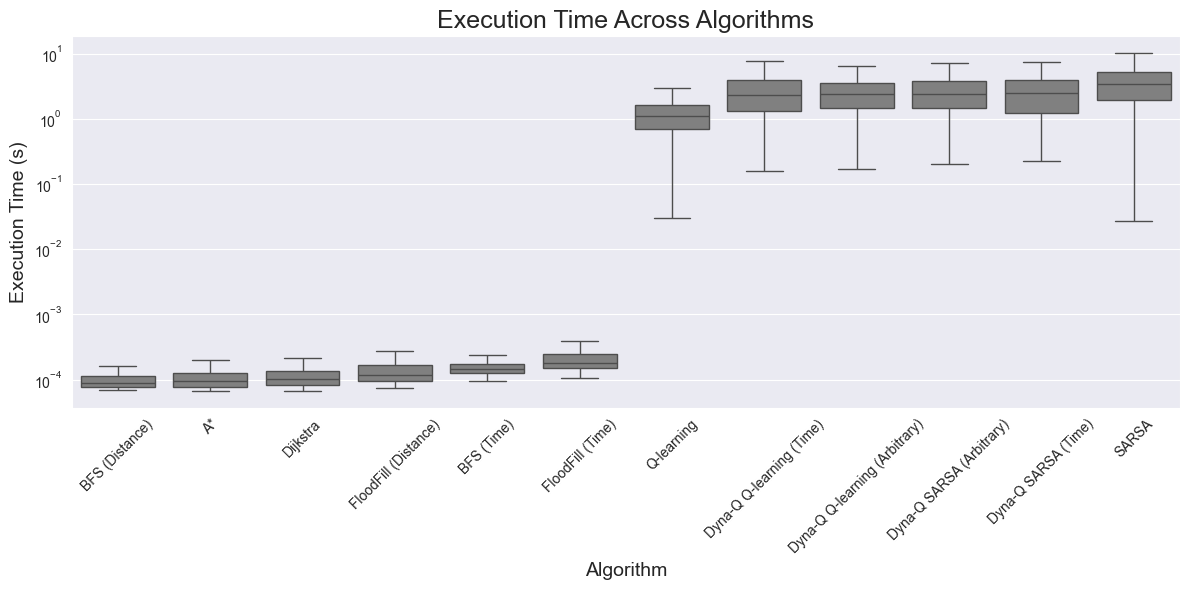

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define the list of DataFrames and their corresponding algorithm names
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Arbitrary)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Time)', df_dyna_qlearning_time),
    ('Dyna-Q SARSA (Arbitrary)', dynaq_sarsa_arbt),
    ('Dyna-Q SARSA (Time)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Convert Execution Time from microseconds to seconds
df_combined_RL['Execution Time (secs)'] = df_combined_RL['Execution Time (micro secs)'] * pow(10, -6)

# Calculate median execution time for sorting
median_execution_time = df_combined_RL.groupby('Algorithm')['Execution Time (secs)'].median().sort_values()

# Sort the DataFrame based on the median execution time
df_combined_RL['Algorithm'] = pd.Categorical(df_combined_RL['Algorithm'], categories=median_execution_time.index, ordered=True)
df_combined_RL = df_combined_RL.sort_values('Algorithm')

# Set up the figure for the execution time plot
plt.figure(figsize=(12, 6))

# Use a single shade of gray
sns.boxplot(x='Algorithm', y='Execution Time (secs)', data=df_combined_RL, showfliers=False, color='gray')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Execution Time Across Algorithms', fontsize=18)
plt.xlabel('Algorithm',  fontsize=14)
plt.ylabel('Execution Time (s)', fontsize=14)
plt.xticks(rotation=45)

# Add a legend with different shades representing different algorithms
legend_labels = median_execution_time.index.tolist()
legend_colors = sns.color_palette("Greys", len(legend_labels))


# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as PDF, EPS, and SVG
plt.savefig('results/figures/results-section/execution_time_comparison.pdf', format='pdf')
# plt.savefig('results/figures/results-section/execution_time_comparison.eps', format='eps')
# plt.savefig('results/figures/results-section/execution_time_comparison.svg', format='svg')

# Show the plot
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Arbitrary)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Time)', df_dyna_qlearning_time),
    ('Dyna-Q SARSA (Arbitrary)', dynaq_sarsa_arbt),
    ('Dyna-Q SARSA (Time)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

In [26]:

# Assuming dfs is defined as in your code snippet
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Arbitrary)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Time)', df_dyna_qlearning_time),
    ('Dyna-Q SARSA (Arbitrary)', dynaq_sarsa_arbt),
    ('Dyna-Q SARSA (Time)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Set the index to 'Algorithm'
df_combined_RL.set_index('Algorithm', inplace=True)

In [27]:
df = df_combined_RL['Path Time (s)'].groupby('Algorithm').median()

In [28]:
pd.DataFrame(df)

,Path Time (s)
Algorithm,
A*,19.089449
BFS (Distance),19.089449
BFS (Time),18.182607
Dijkstra,19.089449
Dyna-Q Q-learning (Arbitrary),18.148255
Dyna-Q Q-learning (Time),18.561821
Dyna-Q SARSA (Arbitrary),18.452263
Dyna-Q SARSA (Time),18.305871
FloodFill (Distance),18.667844


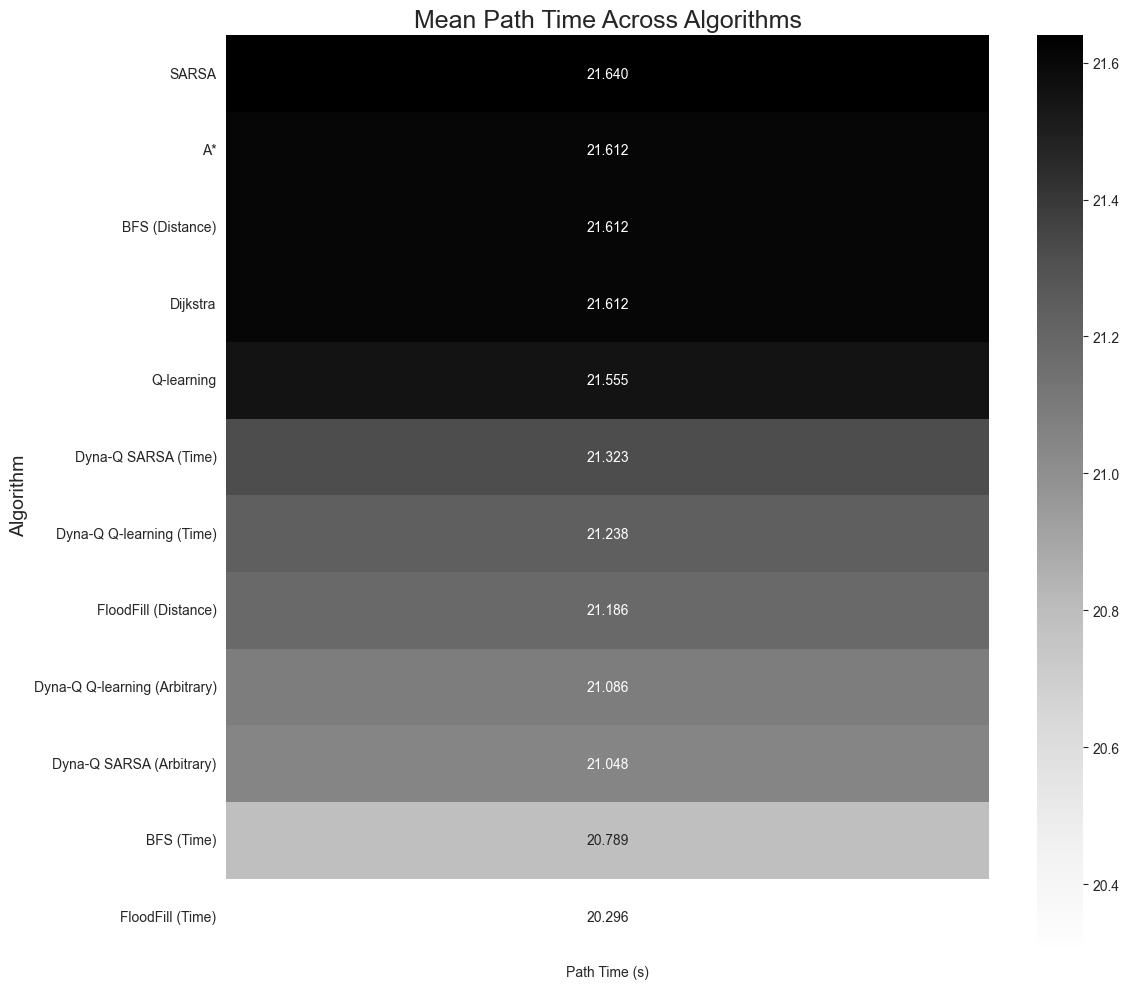

In [29]:
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])

df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(df_pivot, annot=True, fmt=".3f", cmap='Greys', cbar_kws={'label': ''})

plt.title('Mean Path Time Across Algorithms', fontsize=18)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

plt.savefig('results/figures/results-section/path_times_comparison.pdf', format='pdf')

plt.show()


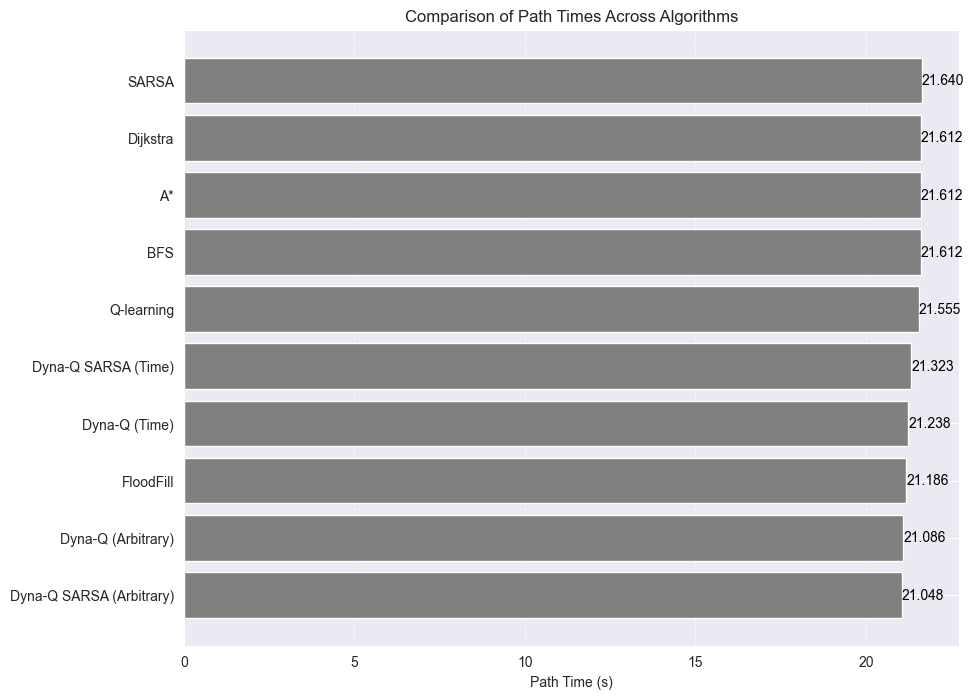

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Combine the data for path times
data = {
    'Algorithm': [
        'FloodFill', 'BFS', 'A*', 'Dijkstra', 
        'SARSA', 'Q-learning', 'Dyna-Q (Arbitrary)', 'Dyna-Q (Time)', 
        'Dyna-Q SARSA (Arbitrary)', 'Dyna-Q SARSA (Time)'
    ],
    'Path Time (s)': [
        df_flood_fill['Path Time (s)'].mean(),
        df_bfs['Path Time (s)'].mean(),
        df_astar['Path Time (s)'].mean(),
        df_dijkstra['Path Time (s)'].mean(),
        df_sarsa['Path Time (s)'].mean(),
        df_qlearning['Path Time (s)'].mean(),
        df_dyna_qlearning_arbt['Path Time (s)'].mean(),
        df_dyna_qlearning_time['Path Time (s)'].mean(),
        df_dynaq_sarsa_arbt['Path Time (s)'].mean(),
        df_dynaq_sarsa_time['Path Time (s)'].mean()
    ]
}

# Create a DataFrame
df_combined = pd.DataFrame(data)

# Sort the DataFrame by 'Path Time (s)' for better visualization
df_combined.sort_values(by='Path Time (s)', ascending=True, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_combined['Algorithm'], df_combined['Path Time (s)'], color='gray')
plt.xlabel('Path Time (s)')
plt.title('Comparison of Path Times Across Algorithms')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with the path times (to 3 decimal places)
for index, value in enumerate(df_combined['Path Time (s)']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', color='black')

plt.show()


So whats the likelihood of doing better even though the mean is greater soemtimes? 

In [ ]:
import pandas as pd

# Load your data
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill_time.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/dyna_q/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], df_dyna_qlearning_arbt[['Maze Name', 'Path Time (s)']],
                       on='Maze Name', suffixes=('_flood_fill', '_dyna_qlearning_arbt'))

df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']], on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']], on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']], on='Maze Name')

# Rename columns for clarity
df_combined.rename(columns={
    'Path Time (s)_dyna_qlearning_arbt': 'DynaQ_Learning_Arbt',
    'Path Time (s)': 'DynaQ_Learning_Time',
    'Path Time (s)_x': 'DynaQ_Sarsa_Arbt',
    'Path Time (s)_y': 'DynaQ_Sarsa_Time',
    'Path Time (s)_flood_fill': 'FloodFill'}, inplace=True)

# Count the number of times any of the algorithms performed better or the same as FloodFill
count_better = 0
bad = []
for _, row in df_combined.iterrows():
    if (
            # row['DynaQ_Learning_Arbt'] <= row['FloodFill'] or
        row['DynaQ_Learning_Time'] < row['FloodFill']):
        # row['DynaQ_Sarsa_Arbt'] <= row['FloodFill'] or
        # row['DynaQ_Sarsa_Time'] <= row['FloodFill']):
            print(f'dyna: {row}')
            count_better += 1
# Calculate the probability
probability_better = count_better / len(df_combined)

print(f"The probability that any of the Dyna-Q algorithms performed better than FloodFill is {probability_better:.2f}, count = {count_better}")
print(bad)


The results show that there is a 34% chance that the RL algorithm with the dynamic reward system would perform better than FloodFill, and a 30% chance that it would give the same result. This equates to a 64% probability of performing better or at least the same.
When running both algorithms that use the dynamic reward structure, the probability of performing better increases to 44%, with an 86% chance of being better or the same. If we consider all four algorithms, the probability rises to 50% for performing better and 92% for being better or the same.
These results align with our expectations. While the mean and median differences may not be significant in the discussion, they do highlight that when the algorithms fail, they tend to get stuck in local minima.
Thanks again for your continued support.
Best regards,
Faris

running agent 1
running agent 2
running agent 3
running agent 1
running agent 2
running agent 3
running agent 1
episode: 0, steps: 770
episode: 1, steps: 336
episode: 2, steps: 530
episode: 3, steps: 74
episode: 4, steps: 74
episode: 5, steps: 74
running agent 2
episode: 0, steps: 730
episode: 1, steps: 596
episode: 2, steps: 72
episode: 3, steps: 64
episode: 4, steps: 64
running agent 3
episode: 0, steps: 944
episode: 1, steps: 342
episode: 2, steps: 74
episode: 3, steps: 74
episode: 4, steps: 74
running agent 1
episode: 0, steps: 1270
episode: 1, steps: 452
episode: 2, steps: 70
episode: 3, steps: 90
episode: 4, steps: 148
episode: 5, steps: 108
episode: 6, steps: 134
episode: 7, steps: 64
episode: 8, steps: 64
episode: 9, steps: 64
running agent 2
episode: 0, steps: 1304
episode: 1, steps: 186
episode: 2, steps: 136
episode: 3, steps: 180
episode: 4, steps: 64
episode: 5, steps: 64
episode: 6, steps: 64
running agent 3
episode: 0, steps: 1396
episode: 1, steps: 312
episode: 2, steps

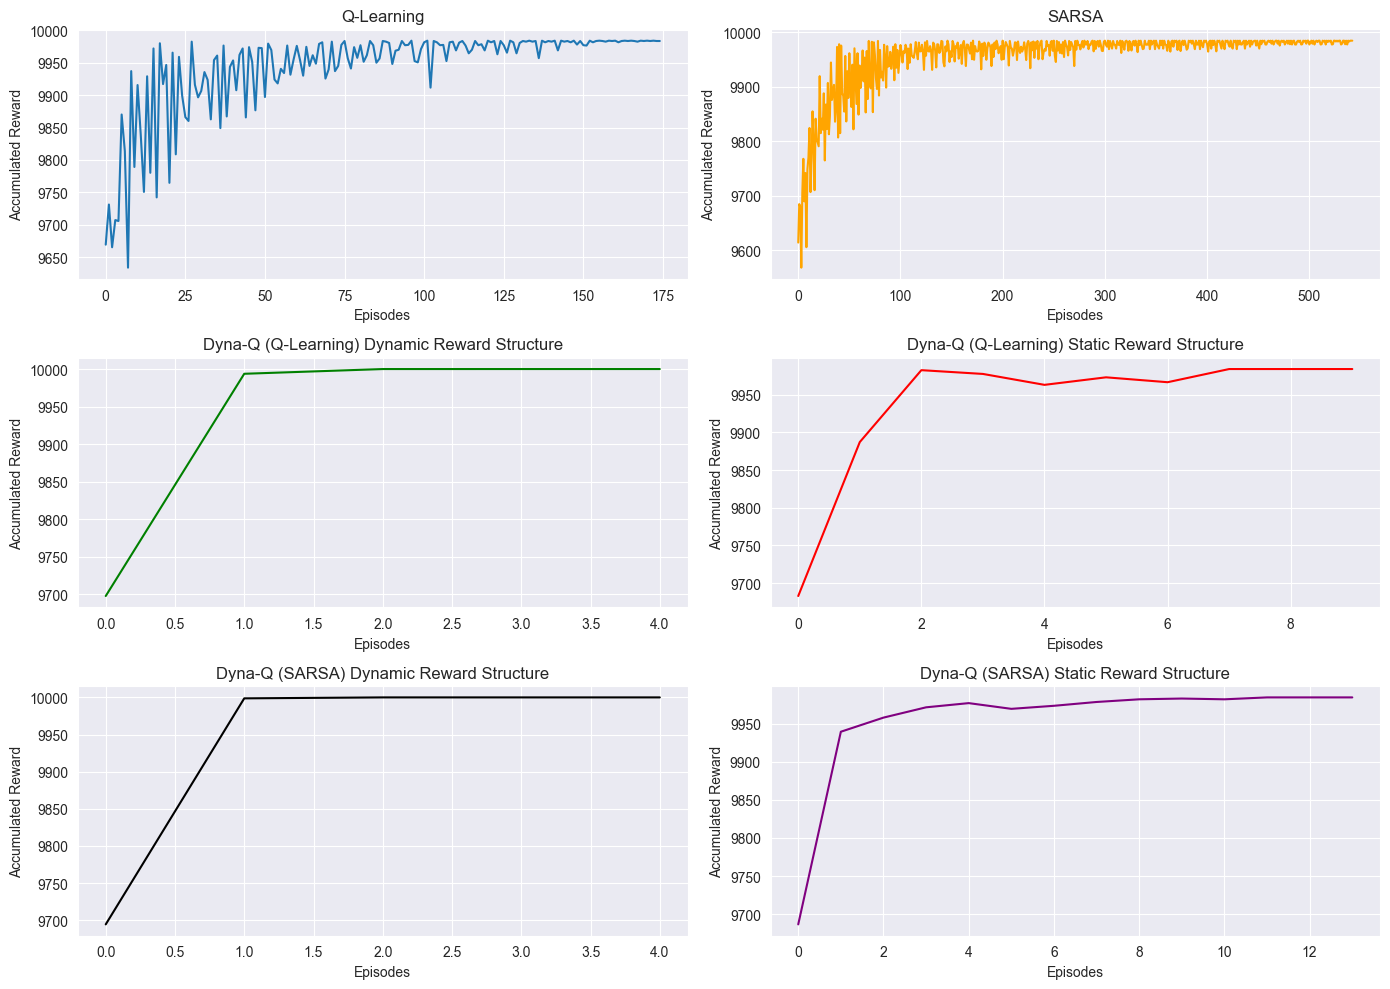

In [3]:
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa
from algorithms.utilities.Utils import Utils

import matplotlib.pyplot as plt
import seaborn as sns

# Load the maze
maze = Utils.load_maze('mazes/competition_json/87us1.json')

# Initialize the algorithms
qlearning = QLearning(walls=maze)
sarsa = Sarsa(walls=maze)
dynaq_qlearning_time = DynaQLearning(walls=maze)
dynaq_qlearning_arbt = DynaQLearning(walls=maze, arbitrary=True)
dynaq_sarsa_time = DynaQSarsa(walls=maze)
dynaq_sarsa_arbt = DynaQSarsa(walls=maze, arbitrary=True)


# Run the algorithms to get the learning curves (rewards over episodes)
qlearning_rewards = qlearning.run_qlearning()
sarsa_rewards = sarsa.run_sarsa()
dynaq_qlearning_time_rewards = dynaq_qlearning_time.run_dyna_qlearning()
dynaq_qlearning_arbt_rewards = dynaq_qlearning_arbt.run_dyna_qlearning()
dynaq_sarsa_time_rewards = dynaq_sarsa_time.run_dyna_sarsa()
dynaq_sarsa_arbt_rewards = dynaq_sarsa_arbt.run_dyna_sarsa()

# Set up the subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Plot the learning curves
ax[0, 0].plot(qlearning_rewards, label='Q-Learning')
ax[0, 0].set_title('Q-Learning')
ax[0, 0].set_xlabel('Episodes')
ax[0, 0].set_ylabel('Accumulated Reward')

ax[0, 1].plot(sarsa_rewards, label='SARSA', color='orange')
ax[0, 1].set_title('SARSA')
ax[0, 1].set_xlabel('Episodes')
ax[0, 1].set_ylabel('Accumulated Reward')

ax[1, 0].plot(dynaq_qlearning_time_rewards, label='Dyna-Q (Q-Learning) Dynamic Reward', color='green')
ax[1, 0].set_title('Dyna-Q (Q-Learning) Dynamic Reward Structure')
ax[1, 0].set_xlabel('Episodes')
ax[1, 0].set_ylabel('Accumulated Reward')

ax[1, 1].plot(dynaq_qlearning_arbt_rewards, label='Dyna-Q (Q-Learning) Static Reward', color='red')
ax[1, 1].set_title('Dyna-Q (Q-Learning) Static Reward Structure')
ax[1, 1].set_xlabel('Episodes')
ax[1, 1].set_ylabel('Accumulated Reward')

ax[2, 0].plot(dynaq_sarsa_time_rewards, label='Dyna-Q (Hybrid) Dynamic Reward', color='black')
ax[2, 0].set_title('Dyna-Q (SARSA) Dynamic Reward Structure')
ax[2, 0].set_xlabel('Episodes')
ax[2, 0].set_ylabel('Accumulated Reward')

ax[2, 1].plot(dynaq_sarsa_arbt_rewards, label='Dyna-Q (Hybrid) Static Reward', color='purple')
ax[2, 1].set_title('Dyna-Q (SARSA) Static Reward Structure')
ax[2, 1].set_xlabel('Episodes')
ax[2, 1].set_ylabel('Accumulated Reward')

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('results/figures/results-section/RL_learning_curves.pdf', format='pdf')


# Show the plot
plt.show()
